<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [13]:
!pip install pandas
!pip install matplotlib
!pip install numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [14]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




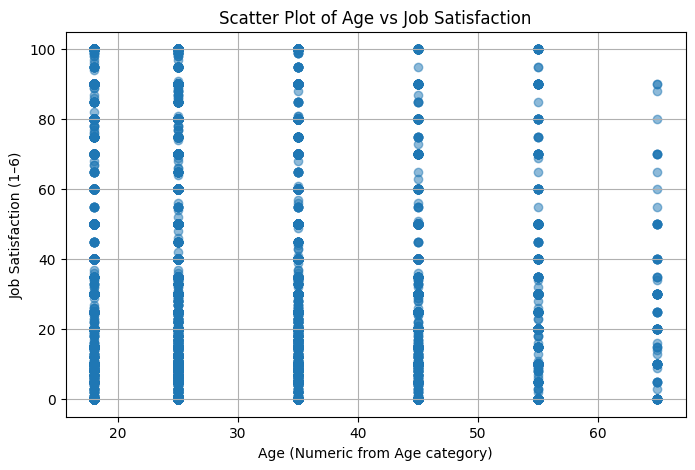

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64


In [8]:
## Write your code here
age_col = 'Age'
jobsat_col = 'JobSatPoints_6'

# Convert JobSat to numeric (anything non-numeric becomes NaN)
df[jobsat_col] = pd.to_numeric(df[jobsat_col], errors='coerce')

# Convert Age ranges to a numeric value using the LOWER bound of the range
# Example: "25-34 years old" -> 25, "65 years or older" -> 65
df['Age_num'] = (
    df[age_col]
    .astype(str)
    .str.extract(r'(\d+)')  # grab the first number that appears
    .astype(float)
)

# Keep only valid rows
plot_df = df[['Age_num', jobsat_col]].dropna()

plt.figure(figsize=(8,5))
plt.scatter(plot_df['Age_num'], plot_df[jobsat_col], alpha=0.5)
plt.title('Scatter Plot of Age vs Job Satisfaction')
plt.xlabel('Age (Numeric from Age category)')
plt.ylabel('Job Satisfaction (1–6)')
plt.grid(True)
plt.show()

print(df[age_col].value_counts().head(20))

# The scatter plot shows how job satisfaction varies across different age groups. Job satisfaction scores are spread across all age ranges, with no strong linear relationship between age and satisfaction. This suggests that job satisfaction is influenced by factors beyond age alone, although moderate clustering appears within common working-age ranges.

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


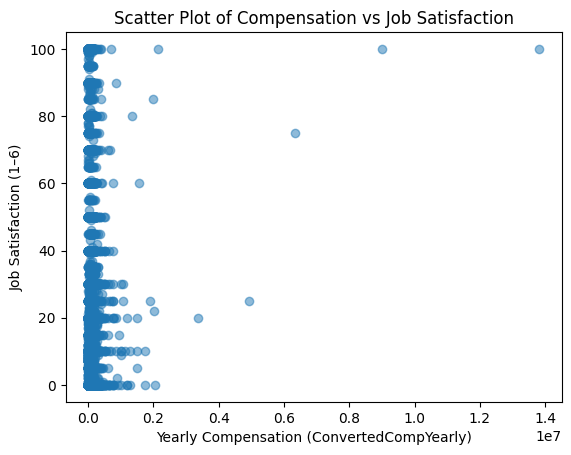

In [10]:
## Write your code here
# Convert columns to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop invalid rows
df_scatter = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

plt.scatter(df_scatter['ConvertedCompYearly'], df_scatter['JobSatPoints_6'], alpha=0.5)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (1–6)')
plt.title('Scatter Plot of Compensation vs Job Satisfaction')
plt.show()

# The scatter plot shows that job satisfaction varies across all compensation levels, with no strong linear relationship between compensation and satisfaction. While higher compensation appears at multiple satisfaction levels, the wide spread suggests that job satisfaction is influenced by factors beyond salary alone.


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


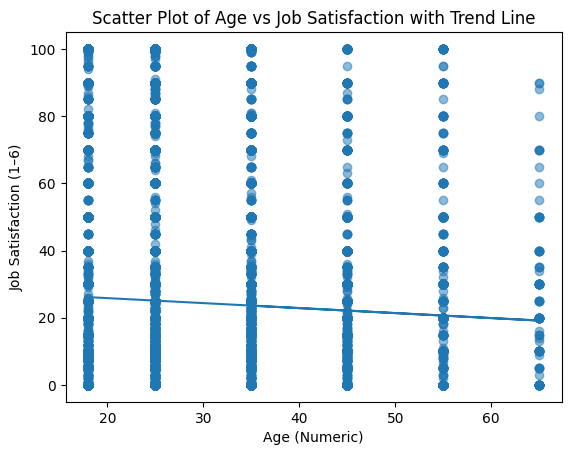

In [16]:
## Write your code here
# Convert JobSatPoints_6 to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Convert Age ranges to numeric using the first number in the range
df['AgeNumeric'] = (
    df['Age']
    .astype(str)
    .str.extract(r'(\d+)')
    .astype(float)
)

# Drop invalid rows
plot_df = df.dropna(subset=['AgeNumeric', 'JobSatPoints_6'])

# Scatter plot
plt.scatter(plot_df['AgeNumeric'], plot_df['JobSatPoints_6'], alpha=0.5)

# Add regression line
m, b = np.polyfit(plot_df['AgeNumeric'], plot_df['JobSatPoints_6'], 1)
plt.plot(
    plot_df['AgeNumeric'],
    m * plot_df['AgeNumeric'] + b
)

plt.xlabel('Age (Numeric)')
plt.ylabel('Job Satisfaction (1–6)')
plt.title('Scatter Plot of Age vs Job Satisfaction with Trend Line')
plt.show()

# The scatter plot with a regression line shows a weak relationship between age and job satisfaction. The trend line suggests only a slight change in job satisfaction as age increases, indicating that age alone does not strongly predict job satisfaction. Job satisfaction appears to be influenced by multiple factors beyond age.

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


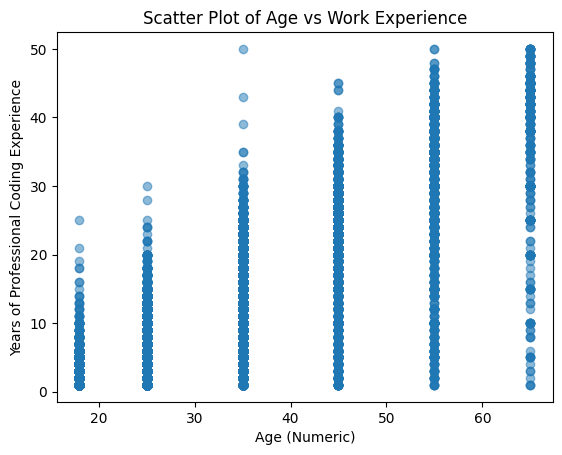

In [17]:
## Write your code here

# Convert Age ranges to numeric using the first number in the range
df['AgeNumeric'] = (
    df['Age']
    .astype(str)
    .str.extract(r'(\d+)')
    .astype(float)
)

# Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop invalid rows
plot_df = df.dropna(subset=['AgeNumeric', 'YearsCodePro'])

plt.scatter(plot_df['AgeNumeric'], plot_df['YearsCodePro'], alpha=0.5)
plt.xlabel('Age (Numeric)')
plt.ylabel('Years of Professional Coding Experience')
plt.title('Scatter Plot of Age vs Work Experience')
plt.show()

# The scatter plot shows a clear positive relationship between age and years of professional coding experience. As age increases, work experience generally increases as well, although there is variability within age groups. This indicates that while age and experience are related, individuals accumulate professional experience at different rates.

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


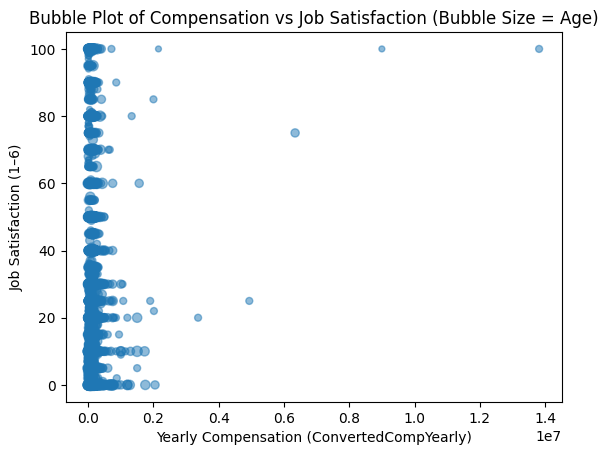

In [19]:
## Write your code here
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Convert Age ranges to numeric using first number in range
df['AgeNumeric'] = (
    df['Age']
    .astype(str)
    .str.extract(r'(\d+)')
    .astype(float)
)

# Drop invalid rows
plot_df = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric'])

# Bubble plot
plt.scatter(
    plot_df['ConvertedCompYearly'],
    plot_df['JobSatPoints_6'],
    s=plot_df['AgeNumeric'],   # bubble size = age
    alpha=0.5
)

plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (1–6)')
plt.title('Bubble Plot of Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.show()

# The bubble plot shows that job satisfaction varies across all compensation levels, with no strong linear relationship between salary and satisfaction. Larger bubbles, representing older respondents, appear across a wide range of compensation and satisfaction levels. This suggests that while age, compensation, and job satisfaction are related, no single factor alone determines job satisfaction.

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


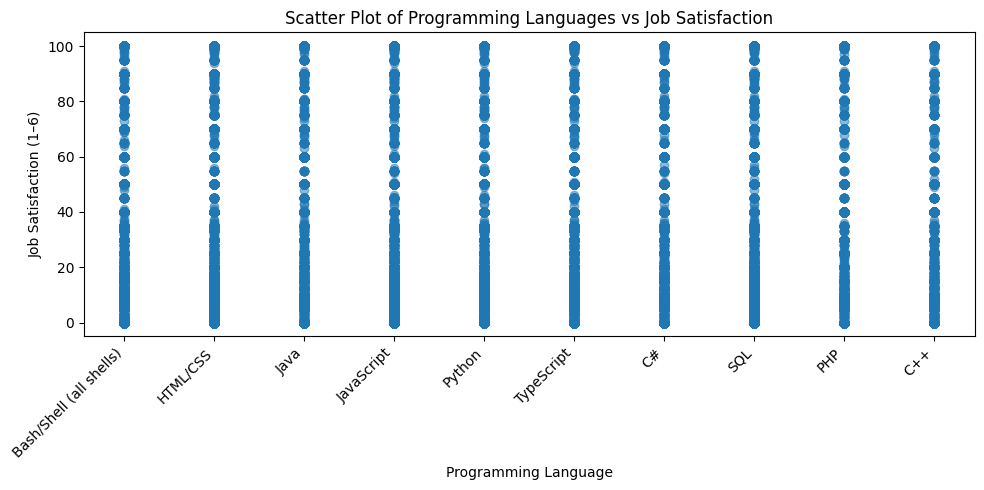

In [21]:
## Write your code here
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing values
plot_df = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'])

# Split languages (they are semicolon-separated)
plot_df = plot_df.assign(
    Language=plot_df['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

# Keep top 10 most common languages to avoid clutter
top_languages = plot_df['Language'].value_counts().head(10).index
plot_df = plot_df[plot_df['Language'].isin(top_languages)]

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(
    plot_df['Language'],
    plot_df['JobSatPoints_6'],
    alpha=0.5
)

plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction (1–6)')
plt.title('Scatter Plot of Programming Languages vs Job Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# The scatter plot shows that job satisfaction varies across all popular programming languages. Each language is associated with a range of satisfaction levels rather than a single value, indicating that job satisfaction is not determined by programming language alone. However, some languages display a wider spread of satisfaction scores, suggesting greater variability in developer experiences when working with those technologies.

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


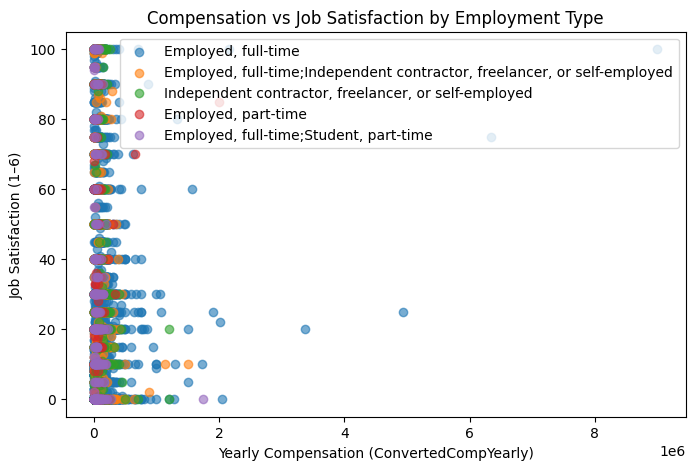

In [22]:
## Write your code here
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop invalid rows
plot_df = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

# Limit to top 5 employment types to keep plot readable
top_employment = plot_df['Employment'].value_counts().head(5).index
plot_df = plot_df[plot_df['Employment'].isin(top_employment)]

plt.figure(figsize=(8, 5))

for emp in top_employment:
    subset = plot_df[plot_df['Employment'] == emp]
    plt.scatter(
        subset['ConvertedCompYearly'],
        subset['JobSatPoints_6'],
        alpha=0.6,
        label=emp
    )

plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (1–6)')
plt.title('Compensation vs Job Satisfaction by Employment Type')
plt.legend()
plt.show()

# The scatter plot shows that the relationship between compensation and job satisfaction varies across employment types. While higher compensation appears across multiple satisfaction levels for all employment categories, some employment types show greater variability in both compensation and satisfaction. This suggests that employment type influences compensation levels, but job satisfaction is shaped by additional factors beyond salary alone.

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


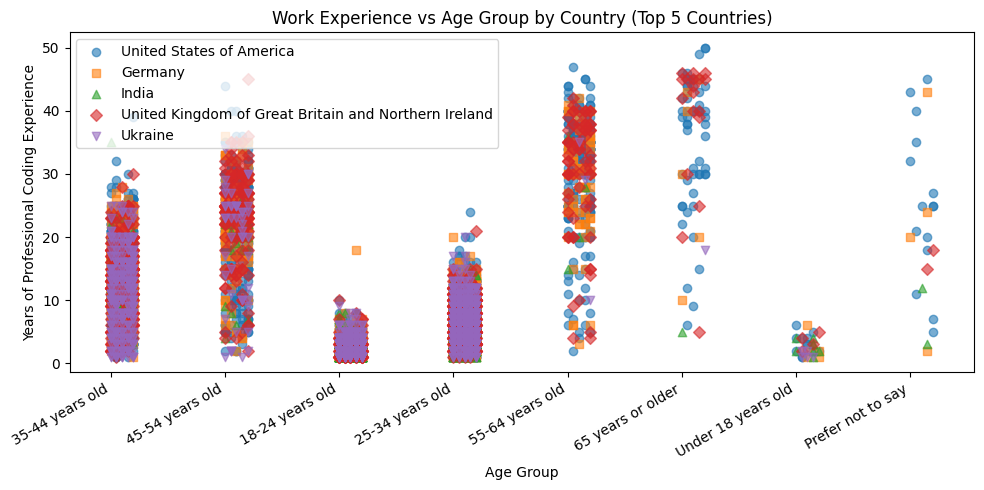

In [27]:
## Write your code here
# Convert YearsCodePro to numeric
# Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Keep only required columns
plot_df = df.dropna(subset=['Age', 'Country', 'YearsCodePro'])

# Select top 5 countries by respondent count
top_countries = plot_df['Country'].value_counts().head(5).index
plot_df = plot_df[plot_df['Country'].isin(top_countries)]

# Map age groups to numeric x positions
age_groups = plot_df['Age'].unique().tolist()
age_to_x = {age: i for i, age in enumerate(age_groups)}
plot_df['AgeX'] = plot_df['Age'].map(age_to_x)

# Add small jitter so points spread horizontally
plot_df['AgeX'] = plot_df['AgeX'] + (pd.Series(range(len(plot_df))) % 5) * 0.05

# Marker styles for age groups
markers = ['o', 's', '^', 'D', 'v', 'x', 'P', '*']

plt.figure(figsize=(10, 5))

for i, country in enumerate(top_countries):
    subset = plot_df[plot_df['Country'] == country]
    plt.scatter(
        subset['AgeX'],
        subset['YearsCodePro'],
        alpha=0.6,
        label=country,
        marker=markers[i % len(markers)]
    )

plt.xticks(range(len(age_groups)), age_groups, rotation=30, ha='right')
plt.xlabel('Age Group')
plt.ylabel('Years of Professional Coding Experience')
plt.title('Work Experience vs Age Group by Country (Top 5 Countries)')
plt.legend()
plt.tight_layout()
plt.show()

# The scatter plot compares years of professional coding experience across different age groups for respondents from the top five countries. As age groups increase, years of professional coding experience generally increase as well, indicating a positive relationship between age and work experience across all countries. However, there is noticeable variation within each age group and across countries, suggesting that developers accumulate professional experience at different rates depending on individual career paths and regional factors. Overall, the plot highlights both a common upward trend with age and meaningful cross-country differences in experience distribution.

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
